In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

  Using cached ultralytics-8.2.50-py3-none-any.whl (799 kB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using ca

Train Yolov8

In [ ]:
from ultralytics import YOLO
import torch
import os
import shutil
import os

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ROOT_DIR = '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo'

model = YOLO('yolov8s.yaml')
model.to(dev)

data_path = os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml')

results = model.train(data=os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml'), epochs=150)

destination_dir = "/content/gdrive/MyDrive/Università/Progetto_completo/runs/"

# Controlla se la directory esiste e rimuovila se necessario
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Ora copia la directory runs nella drive
shutil.copytree("/content/runs", destination_dir)

engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 28.7MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 111MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/train/labels... 664 images, 0 backgrounds, 0 corrupt: 100%|██████████| 664/664 [06:46<00:00,  1.63it/s]


train: New cache created: /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/valid/labels... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [02:35<00:00,  1.42it/s]


val: New cache created: /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.29G      4.043      5.743      4.239         20        640: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        221        226   0.000293     0.0974   0.000178   6.83e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.22G      3.555       4.94      3.896          7        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        221        226   0.000301     0.0989   0.000191   7.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.34G      3.347      4.453      3.576         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        221        226      0.691     0.0142    0.00302   0.000705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       4.2G      3.111      4.251      3.351         13        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        221        226      0.711     0.0142    0.00741    0.00135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       4.2G      2.999      3.944      3.171         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.672     0.0252    0.00151     0.0004



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.19G      2.962      3.788      3.047         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        221        226      0.723     0.0472     0.0206    0.00602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       4.2G      2.921      3.721      3.033         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        221        226      0.689     0.0267    0.00663    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       4.2G      2.974      3.612      2.962         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.723      0.055     0.0267    0.00738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.18G       2.82      3.536      2.862         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        221        226      0.736     0.0503     0.0325      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       4.2G      2.782      3.338       2.79         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        221        226      0.368     0.0377     0.0121    0.00377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       4.2G       2.77      3.345       2.76         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        221        226      0.392     0.0299     0.0171    0.00524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150       4.2G      2.723      3.225      2.723         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        221        226      0.732     0.0267     0.0196    0.00482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.18G      2.643      3.092      2.652          9        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        221        226      0.785     0.0582     0.0559     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       4.2G       2.65      3.171      2.643         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        221        226      0.753     0.0566     0.0334     0.0133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       4.2G      2.593      3.178      2.625         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        221        226      0.444     0.0975     0.0749       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       4.2G      2.531      3.011      2.571         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        221        226      0.463     0.0692     0.0664     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       4.2G      2.543      2.945      2.573         13        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]

                   all        221        226      0.422     0.0597      0.055     0.0205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       4.2G      2.469      2.872      2.506         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        221        226      0.781       0.11     0.0808     0.0329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.18G      2.461      2.871      2.473         13        640: 100%|██████████| 42/42 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226      0.798     0.0786      0.072     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       4.2G       2.39      2.785      2.437          7        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]

                   all        221        226      0.482     0.0833     0.0915     0.0434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.18G      2.379      2.804      2.452         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        221        226      0.503      0.119      0.125     0.0552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.19G      2.335      2.689      2.406         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        221        226      0.533      0.116      0.133     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       4.2G      2.389      2.717      2.409         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        221        226      0.863      0.113      0.148      0.076



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       4.2G      2.303      2.639      2.383         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        221        226      0.555      0.116      0.148     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       4.2G      2.287      2.543      2.366          6        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        221        226      0.504      0.117      0.119     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       4.2G      2.313      2.532      2.383         11        640: 100%|██████████| 42/42 [00:23<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        221        226      0.905      0.135      0.163     0.0805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       4.2G      2.187      2.379      2.279          8        640: 100%|██████████| 42/42 [00:22<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        221        226      0.839      0.124      0.128     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.21G      2.122      2.364      2.206          6        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        221        226       0.89       0.14       0.16     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.18G      2.183      2.346      2.274         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        221        226      0.574      0.142      0.172     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       4.2G      2.212      2.421      2.339         15        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        221        226       0.88      0.157      0.195     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.18G      2.185      2.352      2.237         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        221        226      0.904      0.148      0.179       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.21G      2.132      2.297       2.23         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        221        226      0.892      0.147       0.21     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.18G      2.084      2.308      2.213          7        640: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        221        226      0.853      0.145      0.157     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       4.2G      2.078      2.274      2.198         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        221        226      0.893      0.156      0.228      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       4.2G      2.066      2.253      2.178         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        221        226      0.927      0.152      0.219      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.21G          2      2.167      2.145         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        221        226      0.893      0.149      0.213     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       4.2G      2.017      2.185      2.171         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.926      0.162      0.243      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.21G      2.028      2.114      2.137          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        221        226      0.614      0.261      0.215     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       4.2G      1.959      2.069      2.078         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        221        226      0.929      0.163      0.243       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.21G      1.977      2.064      2.097         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        221        226      0.646      0.208       0.22      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.18G      1.943      1.975       2.07          7        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        221        226      0.922      0.184      0.224      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       4.2G      1.947      2.027      2.095         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        221        226      0.592      0.219      0.269      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       4.2G       1.87      1.952       2.05         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        221        226      0.914      0.184      0.277      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       4.2G      1.845      1.899       1.99          9        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        221        226      0.682      0.273      0.274      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.18G      1.916      1.948      2.035         15        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        221        226       0.65      0.249      0.245      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.21G      1.877      1.918       2.02         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        221        226      0.717      0.192      0.222      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       4.2G      1.878      1.914      2.011         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

                   all        221        226      0.801      0.249      0.291       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.21G      1.869      1.897      2.006         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.715      0.214      0.275      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.18G      1.832      1.911      2.009         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        221        226      0.821      0.265      0.317       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.18G      1.805      1.859      1.963         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        221        226      0.618      0.298      0.277       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.19G      1.823      1.853      2.016         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        221        226      0.683      0.276      0.317      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150       4.2G      1.776      1.795      1.964          7        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226      0.801      0.267      0.307      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       4.2G      1.792      1.782      1.991         16        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226      0.798      0.295      0.338      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       4.2G      1.779      1.756       1.96         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        221        226      0.659      0.293      0.462      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.17G      1.757      1.687        1.9          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        221        226      0.723      0.324      0.402      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       4.2G      1.704      1.688      1.895         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.935      0.238      0.338      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.18G      1.715      1.715      1.866         17        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        221        226       0.71      0.253      0.326      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       4.2G      1.724      1.679      1.887         19        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        221        226      0.787      0.278      0.292      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.17G      1.725      1.719      1.933         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        221        226      0.849      0.259      0.338       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.21G      1.721      1.671      1.898         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        221        226      0.792      0.285      0.345      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.17G      1.729      1.681      1.954          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226      0.782      0.244      0.384      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       4.2G      1.662      1.637      1.885         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        221        226      0.774      0.272      0.488      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150       4.2G       1.71      1.642      1.899         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        221        226      0.733      0.277      0.471      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       4.2G      1.611      1.557      1.839         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        221        226      0.814      0.295      0.666      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.18G      1.671      1.618      1.879         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226      0.868      0.285      0.676      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       4.2G      1.653      1.572      1.856         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        221        226      0.752      0.275      0.653      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.18G      1.545      1.455      1.771         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        221        226      0.746      0.304       0.66      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.18G      1.596      1.538        1.8         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]

                   all        221        226      0.803      0.312      0.685      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       4.2G      1.615      1.548      1.791         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        221        226      0.818       0.28      0.682       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       4.2G      1.619      1.548      1.812         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        221        226      0.826      0.309      0.675      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.17G      1.614      1.526      1.799         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226      0.952      0.316       0.71      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.21G      1.563      1.425      1.803         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        221        226      0.971      0.294      0.705      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       4.2G      1.626      1.481      1.811         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        221        226      0.684      0.334      0.386      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       4.2G      1.554      1.484      1.788         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        221        226      0.875      0.272      0.507      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.17G      1.587      1.516       1.82         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        221        226      0.828      0.337      0.699      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.19G      1.555      1.414      1.752         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        221        226      0.875      0.259      0.525      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       4.2G      1.512      1.366      1.723          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        221        226      0.814      0.297      0.433      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       4.2G      1.525      1.399      1.753         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        221        226      0.788      0.351      0.708      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.19G      1.478      1.406      1.719         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.904      0.334      0.548      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150       4.2G      1.499      1.383      1.717         19        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226       0.84      0.336      0.385      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150       4.2G      1.537       1.41      1.754         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        221        226       0.86      0.278      0.676      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.21G      1.545      1.419      1.753          9        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.854      0.317      0.411      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.19G      1.518      1.388      1.733          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        221        226      0.818      0.343        0.5      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       4.2G      1.492      1.356      1.711          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        221        226      0.934      0.326      0.521      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.18G      1.496      1.368      1.734         15        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        221        226      0.855      0.268      0.718       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.18G      1.463      1.295      1.677         15        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        221        226      0.958      0.321      0.588      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.18G      1.461      1.314      1.704         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        221        226      0.757      0.355      0.489      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150       4.2G      1.459      1.301      1.717         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        221        226      0.805      0.375       0.45      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.18G      1.441      1.323      1.694         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        221        226      0.866      0.324      0.422      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       4.2G      1.463      1.317      1.696         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226      0.876       0.34       0.43      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.18G       1.42      1.308      1.675         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        221        226      0.872      0.396      0.756      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       4.2G      1.405       1.24      1.656         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        221        226      0.646      0.388      0.475      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       4.2G      1.444      1.327      1.684         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        221        226      0.866      0.318      0.429      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.18G      1.369      1.187      1.599         18        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        221        226      0.703      0.327      0.403      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       4.2G       1.39      1.236      1.644         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.833        0.3      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       4.2G      1.376      1.184      1.607         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        221        226      0.777      0.368      0.488      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       4.2G       1.38      1.218      1.644         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226      0.696      0.359      0.713      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       4.2G      1.398      1.235      1.649         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        221        226      0.772      0.343      0.537      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.18G      1.382      1.209      1.631         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        221        226        0.8      0.375      0.741      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.18G      1.408      1.255      1.651         15        640: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        221        226      0.713      0.362      0.701       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.17G      1.405      1.255      1.641         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        221        226      0.939      0.318      0.522      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       4.2G      1.383      1.225      1.645         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.741       0.38      0.739      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.18G      1.347      1.175      1.589         18        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        221        226       0.91      0.296      0.568      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150       4.2G        1.3      1.194      1.554         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        221        226      0.865      0.303      0.555      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.18G      1.315       1.19      1.576          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        221        226      0.736      0.346      0.488      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.21G      1.338      1.168        1.6         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        221        226      0.854      0.335      0.572      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150       4.2G      1.334      1.167      1.579         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        221        226      0.844      0.357      0.584       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       4.2G      1.328      1.155      1.579          9        640: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        221        226      0.584      0.426      0.698      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.17G      1.304      1.159       1.58         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226      0.842      0.364      0.745      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       4.2G      1.313      1.158      1.591          5        640: 100%|██████████| 42/42 [00:17<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        221        226      0.624      0.764      0.772      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.17G      1.307      1.088      1.559         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        221        226      0.819      0.364      0.467      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       4.2G      1.286      1.147      1.575         17        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        221        226      0.867      0.296      0.401      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150       4.2G      1.238      1.075       1.51         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        221        226      0.837      0.306      0.427      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       4.2G       1.29      1.125      1.557         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        221        226       0.78      0.412      0.519      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.18G      1.267      1.118      1.568         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        221        226      0.815      0.404      0.511      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.18G      1.299      1.088      1.553         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.878      0.339      0.513      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.17G      1.245      1.051      1.514         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.889      0.366       0.49      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150       4.2G      1.282      1.093      1.553         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        221        226      0.862      0.355      0.415      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.17G      1.279      1.079      1.547         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        221        226      0.918      0.396      0.463      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.18G      1.238      1.064      1.511         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        221        226      0.936      0.382      0.436       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.17G      1.272      1.091       1.54         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.914      0.386      0.478      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150       4.2G      1.223      1.035      1.497         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        221        226      0.881      0.349      0.535      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       4.2G      1.258      1.108      1.581         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.806       0.41      0.595      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150       4.2G      1.241      1.055      1.536         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        221        226      0.914       0.36       0.49      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.18G      1.245      1.081      1.529         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        221        226      0.835      0.402      0.447       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       4.2G      1.221      1.017      1.498         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.872      0.405       0.79       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       4.2G      1.205      1.001      1.475         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        221        226      0.861      0.415      0.548      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.21G      1.207      1.001      1.499         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.884       0.39      0.561      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.18G      1.196      1.016      1.498         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        221        226      0.914      0.394      0.641      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       4.2G      1.216      1.007      1.514         18        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        221        226       0.47      0.767        0.8      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       4.2G      1.195      1.005      1.488         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        221        226      0.869      0.404      0.534      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.18G      1.172     0.9874      1.476          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        221        226      0.824      0.416      0.507      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.18G      1.201      1.003      1.483         16        640: 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        221        226      0.918       0.41      0.496      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.18G      1.144     0.9337       1.43          9        640: 100%|██████████| 42/42 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        221        226      0.883      0.396      0.534      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.18G      1.192      1.031       1.51         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        221        226      0.416      0.657      0.644      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       4.2G      1.173     0.9882      1.468         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        221        226      0.416      0.689      0.642      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.18G      1.137     0.9564      1.462         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        221        226      0.508      0.773      0.661       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       4.2G      1.169     0.9703      1.476         16        640: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        221        226      0.922      0.403      0.642      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.18G      1.159     0.9698      1.488         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        221        226      0.926      0.404      0.633      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       4.2G      1.154     0.9671      1.452         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        221        226      0.933      0.399      0.643      0.347


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150       4.2G      1.044     0.7879      1.454          8        640: 100%|██████████| 42/42 [00:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        221        226      0.922      0.401      0.655      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.18G      1.012     0.7399      1.432          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        221        226      0.924      0.399      0.543        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.18G      1.014     0.7522       1.43          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        221        226      0.919      0.405      0.526      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.18G     0.9907     0.7392      1.433          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        221        226      0.872      0.415      0.617       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       4.2G     0.9951     0.7185      1.417          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        221        226      0.874      0.414      0.605      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       4.2G       0.99     0.7095      1.417          9        640: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        221        226      0.886      0.413      0.611      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.18G     0.9766     0.7221      1.413          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        221        226      0.881      0.418      0.618      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.18G     0.9801     0.7247      1.423          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all        221        226      0.446      0.742       0.69      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       4.2G     0.9734     0.7064      1.397          8        640: 100%|██████████| 42/42 [00:20<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        221        226       0.45      0.751      0.689      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       4.2G     0.9488     0.6943      1.388          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        221        226      0.864      0.446      0.631      0.339



150 epochs completed in 1.031 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


                   all        221        226      0.624      0.764      0.771      0.489
                 knife        207        212      0.569       0.83       0.83      0.508
              monedero          1          1      0.968          1      0.995      0.697
                pistol         13         13      0.336      0.462      0.489      0.264
Speed: 0.4ms preprocess, 4.9ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train2


'/content/gdrive/MyDrive/Università/Progetto_completo/runs/'

Metriche di valutazione Yolov8

In [ ]:
from ultralytics import YOLO
import numpy as np

model = YOLO("/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/runs/detect/train2/weights/best.pt")

metrics= model.val(data="/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml")

precision = metrics.box.p
recall = metrics.box.r
f1_score = metrics.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_yolov8 = np.mean(precision)
mean_recall_yolov8 = np.mean(recall)
mean_f1_yolov8 = np.mean(f1_score)
accuracy_yolov8 = (mean_precision * mean_recall) / (mean_precision + mean_recall)

print(f"Mean Precision: {mean_precision_yolov8:.4f}")
print(f"Mean Recall: {mean_recall_yolov8:.4f}")
print(f"Mean F1 Score: {mean_f1_yolov8:.4f}")
print(f"Accuracy: {accuracy_yolov8:.4f}")

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]


                   all        221        226      0.623      0.764      0.772      0.488
                 knife        207        212      0.567       0.83      0.833       0.51
              monedero          1          1      0.966          1      0.995      0.697
                pistol         13         13      0.336      0.462      0.488      0.258
Speed: 0.8ms preprocess, 11.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val2
Precision per classe: [    0.56727      0.9659     0.33643]
Recall per classe: [    0.83019           1     0.46154]
F1 score per classe: [      0.674     0.98266     0.38918]
Mean Precision: 0.6232
Mean Recall: 0.7639
Mean F1 Score: 0.6819
Accuracy: 0.3432


Testing Yolov8

Saving KnifeDefenseKrav188_jpg.rf.ef514a09bc253a804de249456daab6b6.jpg to KnifeDefenseKrav188_jpg.rf.ef514a09bc253a804de249456daab6b6.jpg

image 1/1 /content/KnifeDefenseKrav188_jpg.rf.ef514a09bc253a804de249456daab6b6.jpg: 640x640 1 knife, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


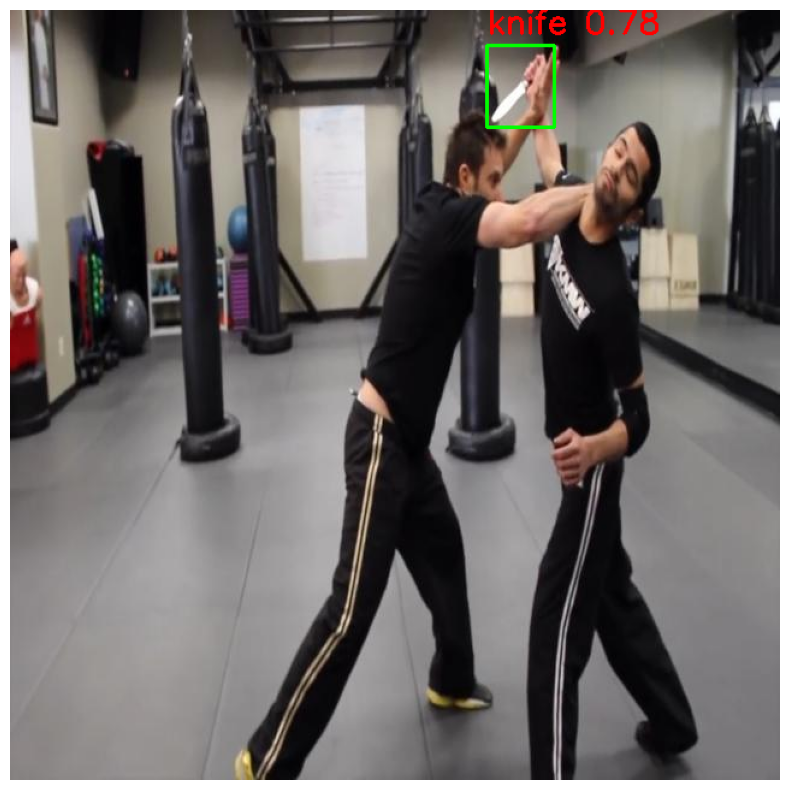

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model.predict(source=filename, conf=0.25, iou=0.45)

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


Train Yolov5

In [ ]:
from ultralytics import YOLO
import torch
import os
import shutil
import os

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ROOT_DIR = '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo'

model = YOLO('yolov5n.yaml')
model.to(dev)

data_path = os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml')

results = model.train(data=os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml'), epochs=150)

destination_dir = "/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/yolo5/runs/"

# Controlla se la directory esiste e rimuovila se necessario
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Ora copia la directory runs nella drive
shutil.copytree("/content/runs", destination_dir)

engine/trainer: task=detect, mode=train, model=yolov5n.yaml, data=/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 6.25M/6.25M [00:00<00:00, 144MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/train/labels.cache... 664 images, 0 backgrounds, 0 corrupt: 100%|██████████| 664/664 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.25G      4.055      5.969      4.221         20        640: 100%|██████████| 42/42 [02:27<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        221        226   0.000266     0.0974   0.000154   6.33e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.26G      3.586       5.45      3.943          7        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        221        226   0.000301      0.126   0.000219   7.77e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.26G      3.445       4.91      3.598         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        221        226   0.000334      0.131   0.000281   9.03e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.27G      3.194      4.783      3.361         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226    0.00127      0.181   0.000869   0.000175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.26G      3.056      4.389      3.176         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.672     0.0189     0.0022   0.000659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.27G      3.002      4.197      3.052         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226       0.68    0.00943     0.0018   0.000449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.26G      2.924      4.095      2.981         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        221        226      0.698     0.0314    0.00912    0.00277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.27G      2.924      3.876      2.884         13        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        221        226      0.695     0.0377    0.00701    0.00219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.26G      2.809      3.839      2.831         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226      0.703      0.014    0.00845    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.27G      2.782      3.587      2.754         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        221        226      0.383     0.0344     0.0152    0.00488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.26G      2.773      3.517       2.72         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        221        226      0.387     0.0189     0.0131    0.00405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.27G      2.659      3.453       2.66         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        221        226      0.728     0.0267     0.0194    0.00768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.26G      2.696       3.34       2.65          9        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        221        226      0.399     0.0519     0.0275     0.0096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.27G      2.647      3.327      2.622         17        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        221        226      0.405      0.033     0.0226     0.0074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.26G      2.649      3.323      2.621         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        221        226        0.4     0.0472     0.0279      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.27G      2.547      3.179      2.577         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        221        226      0.454     0.0597     0.0566     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.26G      2.592      3.142      2.584         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226      0.441     0.0786     0.0577     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.27G      2.529       3.12      2.535         13        640: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]


                   all        221        226      0.745     0.0628     0.0446     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.26G      2.516      3.057      2.483         13        640: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        221        226      0.433     0.0708     0.0562     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.27G      2.466      3.031      2.463          7        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        221        226    0.00323      0.113     0.0389     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.26G      2.421      3.042      2.456         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        221        226      0.425     0.0692     0.0465     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.27G      2.361      2.905      2.383         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        221        226      0.435     0.0456     0.0484     0.0205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.26G      2.403      2.898      2.391         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        221        226       0.55     0.0896      0.136     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.27G      2.292      2.782       2.32         10        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        221        226      0.488      0.101       0.13     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.26G      2.324      2.742      2.364          6        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226      0.487     0.0959     0.0994     0.0436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.27G      2.353      2.777      2.385         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        221        226       0.82      0.108      0.139      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.26G      2.318      2.655      2.324          8        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        221        226      0.883      0.101      0.164     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.27G      2.243      2.578      2.271          6        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        221        226      0.483     0.0959      0.128     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.26G      2.232      2.596      2.273         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        221        226      0.816      0.116       0.12     0.0469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.27G      2.246      2.645       2.34         15        640: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        221        226       0.49     0.0712     0.0705     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.26G      2.305      2.611      2.279         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        221        226      0.514      0.115      0.145     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.27G      2.222      2.468      2.259         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        221        226      0.876      0.124      0.174     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.26G      2.224      2.492      2.266          7        640: 100%|██████████| 42/42 [00:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226      0.876      0.132      0.152     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.27G      2.167      2.545      2.227         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        221        226      0.875      0.115      0.133     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.26G      2.194      2.474      2.209         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226      0.873      0.135      0.178      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.27G      2.108      2.374      2.182         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        221        226      0.885      0.164      0.208     0.0982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.26G      2.112      2.366      2.172         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        221        226      0.871      0.153      0.199     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.27G      2.153      2.335      2.197          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        221        226      0.786      0.189      0.229        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.26G      2.069      2.303       2.13         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226      0.905      0.156      0.196     0.0937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.27G      2.088      2.231      2.115         14        640: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        221        226      0.778      0.184       0.32      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.26G      2.039      2.203      2.109          7        640: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        221        226      0.807      0.225      0.238      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.27G      2.075       2.25      2.138         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        221        226      0.639      0.202      0.237       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.26G       2.05      2.208      2.144         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226      0.649      0.208       0.24       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.27G      2.023      2.187      2.093          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        221        226      0.902      0.176      0.219      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.26G      2.036      2.154      2.101         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        221        226       0.69      0.232      0.229      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.26G      1.982      2.128      2.069         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        221        226      0.905      0.159      0.204      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.26G      2.018      2.136      2.089         15        640: 100%|██████████| 42/42 [00:17<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        221        226      0.679       0.23      0.239      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.27G      1.992        2.1      2.081         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        221        226      0.691      0.277      0.283      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.26G      1.949      2.094      2.071         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        221        226      0.745      0.245      0.296      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.26G      1.942      2.058      2.033         13        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        221        226      0.848      0.237      0.299      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.26G      1.991      2.142      2.084         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        221        226      0.739      0.239      0.273      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.27G      1.929      2.032      2.049          7        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        221        226      0.756      0.234      0.269      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.26G      1.933      1.992       2.07         16        640: 100%|██████████| 42/42 [00:16<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        221        226      0.634      0.207      0.226      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.27G      1.941      2.002      2.039         14        640: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]

                   all        221        226      0.856      0.214      0.279      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.26G      1.917      1.919      1.991          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        221        226      0.725      0.245      0.278       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.26G      1.804      1.854       1.94         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        221        226      0.827      0.272      0.319       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.26G      1.826      1.796      1.911         17        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        221        226      0.705      0.264      0.296      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.27G      1.865      1.917      1.983         19        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        221        226       0.73      0.297      0.315      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.26G      1.926      1.937      2.038         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        221        226      0.717      0.284       0.33      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.27G      1.867      1.851      1.965         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        221        226       0.65      0.221      0.423       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.26G      1.884      1.916      2.013          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        221        226      0.657      0.334      0.333      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.27G      1.843      1.874      1.981         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        221        226      0.576      0.281      0.306      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.26G      1.854      1.858      1.978         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        221        226      0.923      0.215       0.34       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.27G      1.784      1.829      1.927         14        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        221        226      0.759      0.224      0.319       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.26G      1.834        1.8      1.933         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        221        226      0.646      0.323      0.318       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.27G      1.804      1.751      1.931         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        221        226      0.723      0.277      0.321       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.26G      1.718       1.67      1.854         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        221        226      0.728        0.3      0.316      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.26G      1.768      1.692      1.891         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        221        226      0.787      0.318      0.378      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.26G      1.812      1.786      1.891         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        221        226      0.783      0.309      0.356      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.26G      1.761      1.748      1.893         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        221        226      0.731       0.38      0.363      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.26G      1.743      1.712      1.857         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        221        226      0.711      0.286      0.668      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.26G      1.732       1.65        1.9         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        221        226      0.846      0.264      0.366      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.26G      1.748      1.705      1.882         15        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        221        226      0.816      0.272      0.378      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.26G      1.728      1.714      1.879         10        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        221        226      0.695      0.362      0.408      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.26G      1.785      1.773      1.928         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        221        226      0.847      0.314      0.389      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.27G      1.686      1.651      1.837         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        221        226       0.77      0.327      0.392      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.26G      1.669      1.621      1.808          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        221        226      0.917      0.263      0.512      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.26G      1.663      1.638      1.818         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        221        226      0.808      0.369      0.412      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.26G      1.669      1.593      1.824         15        640: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        221        226      0.753      0.318      0.368      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.26G      1.661      1.553      1.813         19        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        221        226      0.703      0.359      0.362      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.26G      1.678      1.608      1.846         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        221        226       0.81      0.299      0.378      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.26G      1.686      1.615      1.813          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        221        226      0.826      0.333       0.46      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.26G      1.667      1.585      1.823          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        221        226      0.833      0.302      0.442      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.26G      1.633      1.561      1.782          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        221        226      0.741      0.313      0.456       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.26G      1.673      1.573      1.818         15        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        221        226        0.8      0.296      0.413      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.26G      1.634      1.539      1.767         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        221        226      0.783      0.321      0.531      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.26G      1.604      1.511      1.785         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        221        226      0.762      0.352      0.719      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.26G      1.604      1.484      1.779         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        221        226      0.892      0.368       0.44      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.26G      1.609      1.518      1.791         12        640: 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        221        226      0.826      0.372      0.538      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.26G      1.645      1.495      1.807         14        640: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        221        226      0.825      0.337      0.539      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.26G      1.581      1.502      1.763         10        640: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        221        226      0.778      0.355       0.41      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.26G      1.555      1.436       1.73         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        221        226      0.807      0.375      0.456      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.26G      1.581      1.479      1.769         16        640: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        221        226      0.786      0.416      0.518      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.27G       1.52      1.371      1.672         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]

                   all        221        226       0.73      0.356      0.446      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.26G      1.543      1.428       1.71         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        221        226      0.811      0.402      0.445       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.26G       1.55       1.43      1.715         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        221        226      0.912      0.351      0.766      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.26G      1.561      1.425      1.734         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.27it/s]

                   all        221        226      0.846      0.429       0.55      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.26G      1.583      1.429      1.758         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        221        226      0.784      0.441      0.546      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.26G      1.534      1.385      1.712         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all        221        226      0.872      0.409      0.515      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.26G      1.599      1.459      1.754         15        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        221        226       0.89       0.34      0.527      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.26G      1.534      1.405       1.72         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        221        226      0.833      0.344      0.732      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.26G      1.529      1.416      1.714         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        221        226      0.889      0.425      0.798       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.26G      1.534      1.385      1.701         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]

                   all        221        226      0.906      0.403      0.509      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.26G      1.492      1.396      1.672         10        640: 100%|██████████| 42/42 [00:19<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        221        226      0.804      0.425      0.582      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.26G      1.478      1.342      1.658          8        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        221        226      0.912      0.389      0.787      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.26G      1.503      1.368      1.694         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        221        226      0.916      0.368      0.775      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.26G      1.519      1.359      1.677         16        640: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226       0.81      0.403      0.472      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.26G       1.51      1.359       1.68          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        221        226      0.819      0.342      0.471      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.26G      1.503      1.377      1.666         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        221        226      0.863      0.403      0.462      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.26G      1.519      1.349      1.703          5        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        221        226      0.914      0.372      0.473      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.26G      1.445      1.263      1.638         15        640: 100%|██████████| 42/42 [02:07<00:00,  3.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        221        226      0.901      0.385      0.467      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.26G      1.476       1.32      1.672         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        221        226      0.877      0.337      0.464      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.26G      1.459      1.245      1.631         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        221        226      0.956      0.334      0.452       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.26G      1.517      1.369      1.678         10        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        221        226      0.873      0.362      0.446      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.26G      1.409      1.301      1.632         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        221        226      0.818      0.411      0.481      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.26G      1.441      1.275      1.629         17        640: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        221        226      0.803      0.401      0.525      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.26G      1.419      1.235      1.603         11        640: 100%|██████████| 42/42 [00:17<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        221        226      0.811      0.444      0.557      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.26G      1.477      1.277      1.662         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        221        226      0.784      0.411      0.469      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.26G      1.455       1.27      1.631         16        640: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]

                   all        221        226      0.803      0.372        0.5      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.26G      1.429      1.244       1.63         14        640: 100%|██████████| 42/42 [00:29<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        221        226      0.837      0.401        0.5      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.26G      1.425      1.236      1.623         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        221        226      0.854      0.355      0.508      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.27G      1.408      1.231      1.595         14        640: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        221        226      0.819      0.419        0.5      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.26G      1.438      1.295      1.684         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        221        226      0.528      0.815      0.786      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.26G      1.411      1.231      1.637         14        640: 100%|██████████| 42/42 [00:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        221        226      0.881      0.441      0.518      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.26G      1.443       1.27      1.644         11        640: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        221        226      0.767      0.426      0.546      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.26G      1.407      1.215      1.621         14        640: 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        221        226      0.899      0.438      0.486      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.26G      1.391      1.218      1.599         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        221        226      0.919       0.37      0.476      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.26G      1.387      1.214      1.606         11        640: 100%|██████████| 42/42 [00:16<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        221        226      0.813      0.455      0.479      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.26G      1.391      1.224      1.605         12        640: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        221        226      0.836      0.434      0.475      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.26G        1.4      1.204      1.609         18        640: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        221        226      0.861       0.41      0.473      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.26G      1.404      1.216      1.596         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        221        226      0.902        0.4      0.611      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.26G      1.367      1.209      1.588          9        640: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]

                   all        221        226      0.777      0.439      0.474      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.26G      1.379       1.19      1.587         16        640: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        221        226      0.856      0.421      0.485      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.26G      1.312      1.098      1.519          9        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        221        226      0.922      0.368      0.621      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.26G      1.362      1.208      1.587         17        640: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        221        226        0.9      0.371      0.479      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.26G      1.388      1.194      1.582         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        221        226      0.889       0.38      0.476      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.26G      1.338      1.138      1.574         11        640: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        221        226      0.796      0.423      0.461      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.27G      1.365      1.163       1.58         16        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        221        226      0.905      0.374      0.566      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.26G      1.352      1.168       1.59         12        640: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        221        226      0.904      0.381      0.479      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.27G      1.346      1.163      1.564         16        640: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        221        226      0.906      0.369      0.482      0.284


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.56G      1.226     0.9682      1.563          8        640: 100%|██████████| 42/42 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        221        226      0.905       0.41      0.495      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.26G      1.193     0.9281      1.534          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        221        226      0.861       0.42      0.514      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.26G      1.183     0.9303      1.542          8        640: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        221        226      0.891      0.449      0.518      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.26G      1.162     0.9249      1.542          8        640: 100%|██████████| 42/42 [00:16<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        221        226      0.906      0.442      0.525      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.26G       1.19     0.9135      1.533          8        640: 100%|██████████| 42/42 [00:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        221        226      0.902      0.444      0.532      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.26G      1.185     0.8935      1.536          9        640: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        221        226      0.883      0.441      0.526      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.26G      1.144     0.9164      1.506          8        640: 100%|██████████| 42/42 [00:32<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        221        226      0.844      0.454      0.564      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.26G      1.173     0.9043      1.527          8        640: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        221        226      0.837      0.462      0.593      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.26G      1.184     0.9083      1.505          8        640: 100%|██████████| 42/42 [00:27<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        221        226      0.871      0.457      0.654       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.26G      1.148     0.8851      1.511          8        640: 100%|██████████| 42/42 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        221        226      0.842      0.461      0.644      0.333



150 epochs completed in 1.070 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503529 parameters, 0 gradients, 7.1 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


                   all        221        226       0.53      0.815      0.786      0.369
                 knife        207        212      0.548       0.83      0.814      0.497
              monedero          1          1      0.825          1      0.995      0.365
                pistol         13         13      0.216      0.615      0.549      0.246
Speed: 0.9ms preprocess, 3.0ms inference, 0.0ms loss, 6.6ms postprocess per image
Results saved to runs/detect/train2


'/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/yolo9/runs/'

Metriche di valutazione Yolov5

In [ ]:
from ultralytics import YOLO
import numpy as np

model = YOLO("/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/yolo5/runs/detect/train2/weights/best.pt")

metrics= model.val(data="/content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/data.yaml")

precision = metrics.box.p
recall = metrics.box.r
f1_score = metrics.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision_yolov5 = np.mean(precision)
mean_recall_yolov5 = np.mean(recall)
mean_f1_yolov5 = np.mean(f1_score)
accuracy_yolov5 = (mean_precision * mean_recall) / (mean_precision + mean_recall)

print(f"Mean Precision: {mean_precision_yolov5:.4f}")
print(f"Mean Recall: {mean_recall_yolov5:.4f}")
print(f"Mean F1 Score: {mean_f1_yolov5:.4f}")
print(f"Accuracy: {accuracy_yolov5:.4f}")

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503529 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/Università/Digital_detection/Progetto_completo/Dataset/valid/labels.cache... 221 images, 0 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.37it/s]


                   all        221        226       0.53      0.815      0.786      0.372
                 knife        207        212      0.547       0.83      0.814      0.498
              monedero          1          1      0.826          1      0.995      0.365
                pistol         13         13      0.216      0.615      0.549      0.255
Speed: 0.9ms preprocess, 7.1ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/val4
Precision per classe: [    0.54735     0.82622     0.21598]
Recall per classe: [    0.83019           1     0.61538]
F1 score per classe: [    0.65973     0.90484     0.31974]
Mean Precision: 0.5299
Mean Recall: 0.8152
Mean F1 Score: 0.6281
Accuracy: 0.3432


Testing Yolov5

Saving ABmframe00412_jpg.rf.d23df8e3931eb7c0d822f5df14544e96.jpg to ABmframe00412_jpg.rf.d23df8e3931eb7c0d822f5df14544e96 (1).jpg

image 1/1 /content/ABmframe00412_jpg.rf.d23df8e3931eb7c0d822f5df14544e96 (1).jpg: 640x640 1 knife, 7.1ms
Speed: 2.7ms preprocess, 7.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


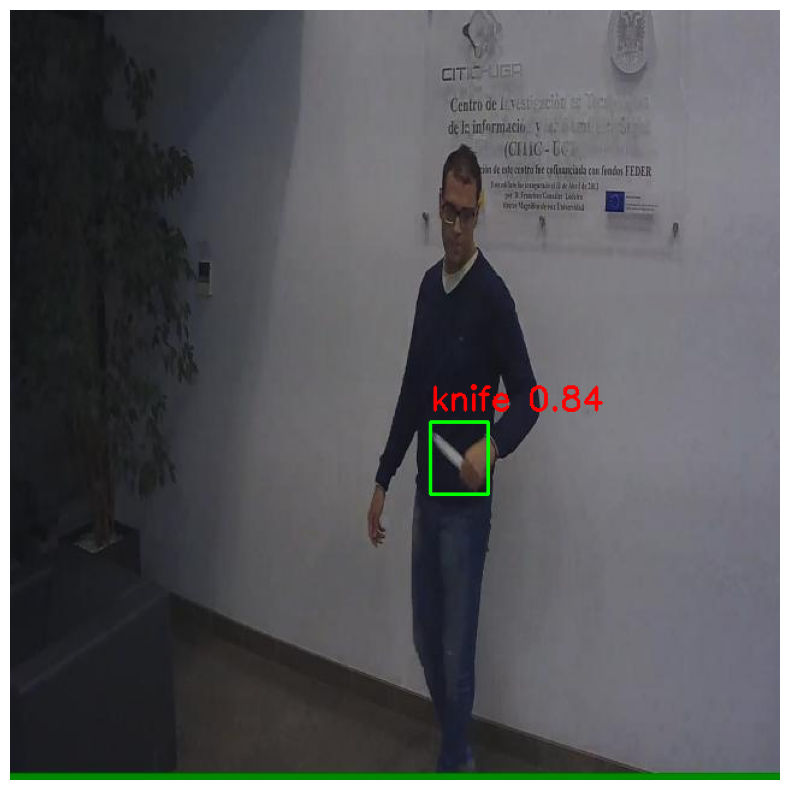

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from google.colab import files

uploaded = files.upload()

filename = list(uploaded.keys())[0]

file_bytes = np.frombuffer(uploaded[filename], np.uint8)
image_up = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image_up, cv2.COLOR_BGR2RGB)

results = model.predict(source=filename, conf=0.25, iou=0.45)

def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    label = f'{class_name} {confidence:.2f}'

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

Performace tra Yolov8 e Yolov5

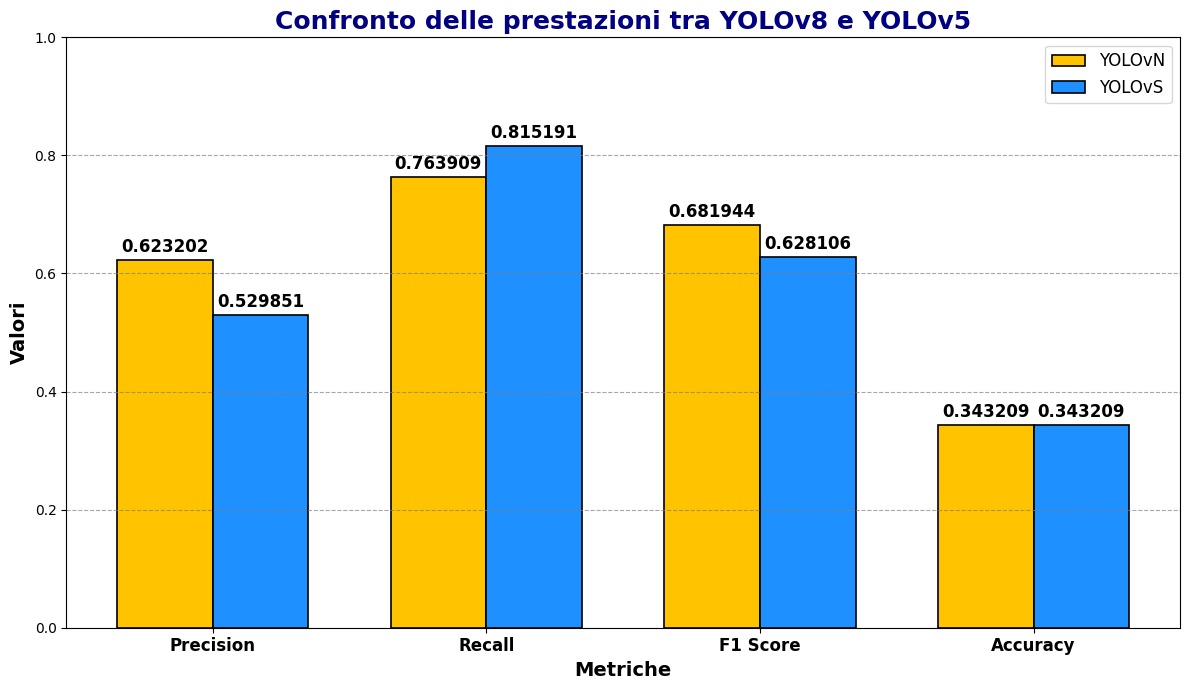

In [ ]:
labels = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
yolovn_values = [mean_precision_yolov8, mean_recall_yolov8, mean_f1_yolov8, accuracy_yolov8]
yolovs_values = [mean_precision_yolov5, mean_recall_yolov5, mean_f1_yolov5, accuracy_yolov5]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, yolovn_values, width, label='YOLOvN', color='#FFC300', edgecolor='black', linewidth=1.2)  # Giallo dorato
bars2 = ax.bar(x + width/2, yolovs_values, width, label='YOLOvS', color='#1E90FF', edgecolor='black', linewidth=1.2)  # Azzurro

ax.set_xlabel('Metriche', fontsize=14, fontweight='bold')
ax.set_ylabel('Valori', fontsize=14, fontweight='bold')
ax.set_title('Confronto delle prestazioni tra YOLOv8 e YOLOv5', fontsize=18, fontweight='bold', color='navy')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.legend(fontsize=12, loc='upper right')

ax.bar_label(bars1, padding=3, fontsize=12, fontweight='bold', color='black')
ax.bar_label(bars2, padding=3, fontsize=12, fontweight='bold', color='black')

ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.7)

ax.set_ylim([0, 1])

fig.tight_layout()

plt.show()